In [1]:
import geopandas
import pandas as pd
import os
import matplotlib.pyplot as plt
import descartes
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'

In [2]:
maps = geopandas.read_file(os.path.join(data_path, 'geo', 'current_districts.shp'))
maps.head()
print(len(maps))

1021


In [3]:
data = pd.read_csv(os.path.join(data_path, 'clean', 'cits.csv'), low_memory = False)
data = data[data.year == 2015][['distname','district', 'doi_year']]
print(len(data))
data.tail(5)

812


,distname,district,doi_year
3239,GRAHAM ISD,252901,2017.0
3240,NEWCASTLE ISD,252902,2017.0
3241,OLNEY ISD,252903,2017.0
3242,ZAPATA COUNTY ISD,253901,2017.0
3243,LA PRYOR ISD,254902,2018.0


In [4]:
texas = geopandas.read_file(os.path.join(data_path, 'geo', 'Texas_State_Boundary.shp'))
texas

,OBJECTID,FIPS,CREATE_USE,CMNT,geometry
0,1,48,TPP,None,"POLYGON ((-100.50024871993 36.4998662107594, -..."


In [5]:
maps = maps.merge(data, left_on = 'DISTRICT_N', right_on = 'district')
print(len(maps))

811


,minx,miny,maxx,maxy
0,-106.320143,31.601042,-106.197152,32.001857
1,-97.191062,31.219434,-96.956559,31.408633
2,-96.830698,31.045146,-96.457060,31.279790
3,-100.945229,34.313248,-100.274948,34.806130
4,-100.957394,33.570584,-100.517949,33.835684


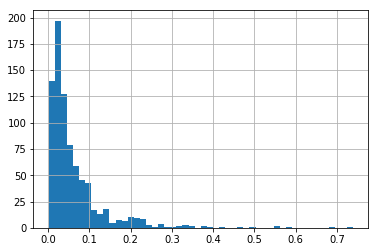

In [6]:
maps.geometry.area.hist(bins = 50)
bounds = maps.bounds
bounds.head()

In [7]:
print(min(bounds.minx))
print(max(bounds.maxx))
print(min(bounds.miny))
print(min(bounds.maxy))

-106.645655792675
-93.5485575840867
25.8371683187577
26.0963473697307


In [1]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
texas.plot(column = 'OBJECTID', edgecolor = 'Black', ax = ax)
maps[pd.isnull(maps.doi_year)].plot(column='doi_year', color = 'red', edgecolor = 'Black', ax=ax, label = 'TPS Districts')
maps[maps.doi_year == 2016].plot(column='doi_year', color = 'green', edgecolor = 'Black', ax=ax, label = '2016-17')
maps[maps.doi_year == 2017].plot(column='doi_year', color = 'blue', edgecolor = 'Black', ax=ax, label = '2017-18')
maps[maps.doi_year == 2018].plot(column='doi_year', color = 'orange', edgecolor = 'Black', ax=ax, label = '2018-19')
maps[maps.doi_year == 2019].plot(column='doi_year', color = 'purple', edgecolor = 'Black', ax=ax, label = '2019-20')
ax.set_xlim(-107, -93)
ax.set_ylim(25, 37)


NameError: name 'plt' is not defined